In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Data Cleaning and Preparation

In [55]:
# Loading the datasets
df1 = pd.read_csv('us_states_covid19_daily.csv')
df2 = pd.read_csv('flights_2020.csv', names=['Year', 'Month', 'Day', 'Airline', 'Origin', 'OriginState', 'Destination', 'DestinationState', 'DepartureTime', 'FlightDuration', 'ArrivalTime', 'Delay', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay'])


In [56]:
# Selecting a sample of 1000 rows from each dataset
sample_size = 1000
df1_sample = df1.sample(n=sample_size, random_state=1)
df2_sample = df2.sample(n=sample_size, random_state=1)

In [57]:
# Converting 'Year', 'Month', 'Day' to string type
df2['Year'] = df2['Year'].astype(str)
df2['Month'] = df2['Month'].astype(str).str.zfill(2)
df2['Day'] = df2['Day'].astype(str).str.zfill(2)

In [58]:
# Combining 'Year', 'Month', 'Day' to form 'date'
df2['date'] = df2['Year'] + df2['Month'] + df2['Day']

# Converting 'date' to integer type
df2['date'] = df2['date'].astype(int)

In [59]:
# Selecting the relevant columns from df1 and df2
df1_subset = df1[['date', 'state', 'positive', 'probableCases', 'negative', 'hospitalizedCumulative', 'recovered']]
df2_subset = df2[['date', 'OriginState', 'DestinationState', 'Delay', 'Cancelled']]

In [ ]:
# Merging datasets on 'date' with a sample size of 1000
merged_df = pd.merge(df1_subset.sample(n=1000, random_state=1), df2_subset.sample(n=1000, random_state=1), on='date', how='inner')

# Selecting only numeric columns for correlation analysis
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns

# Removing non-numeric columns and 'DepartureTime' from the list
numeric_columns = [col for col in numeric_columns if col != 'DepartureTime']

Exploratory Data Analysis and Visualization

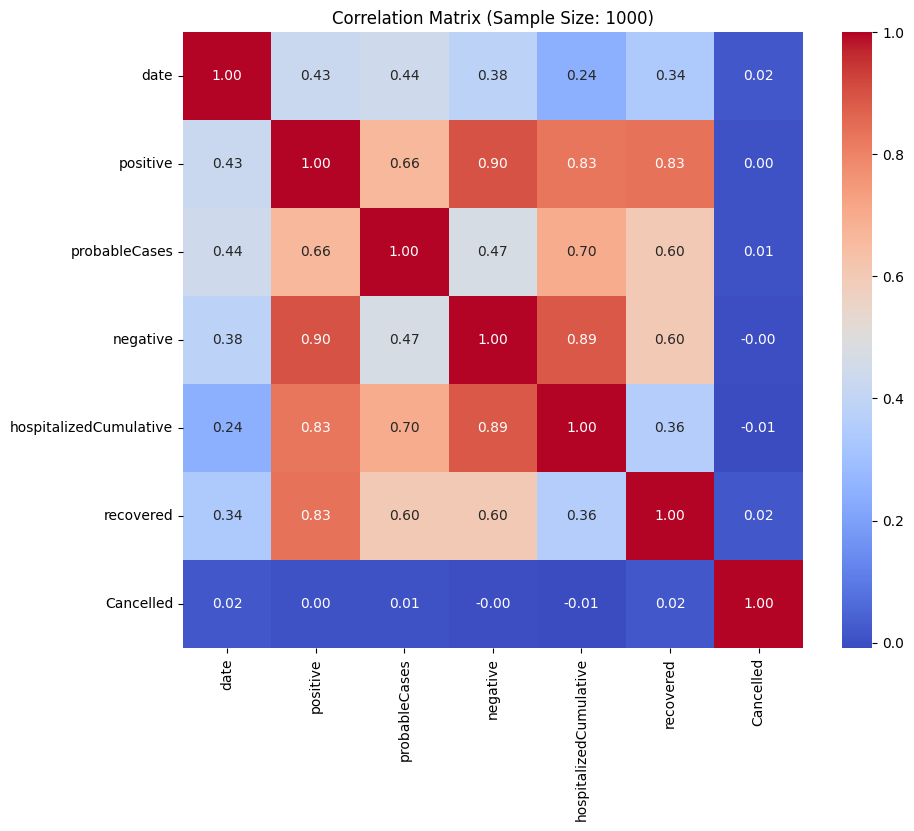

In [60]:
# Computing correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Sample Size: 1000)')
plt.show()


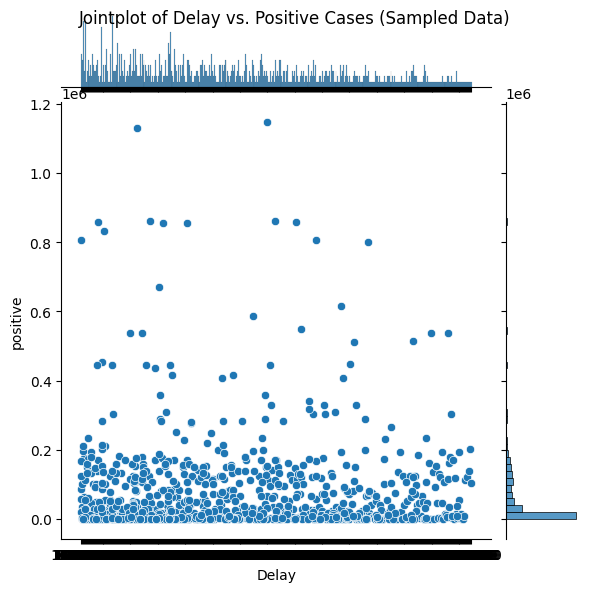

In [61]:
sample_size_jointplot = 1000

# Taking a sample from the merged dataframe
merged_df_sample = merged_df.sample(n=sample_size_jointplot, random_state=1)

# Creating a jointplot with the sampled data
sns.jointplot(x='Delay', y='positive', data=merged_df_sample, kind='scatter')
plt.suptitle('Jointplot of Delay vs. Positive Cases (Sampled Data)')
plt.show()

C:\Users\meand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\meand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


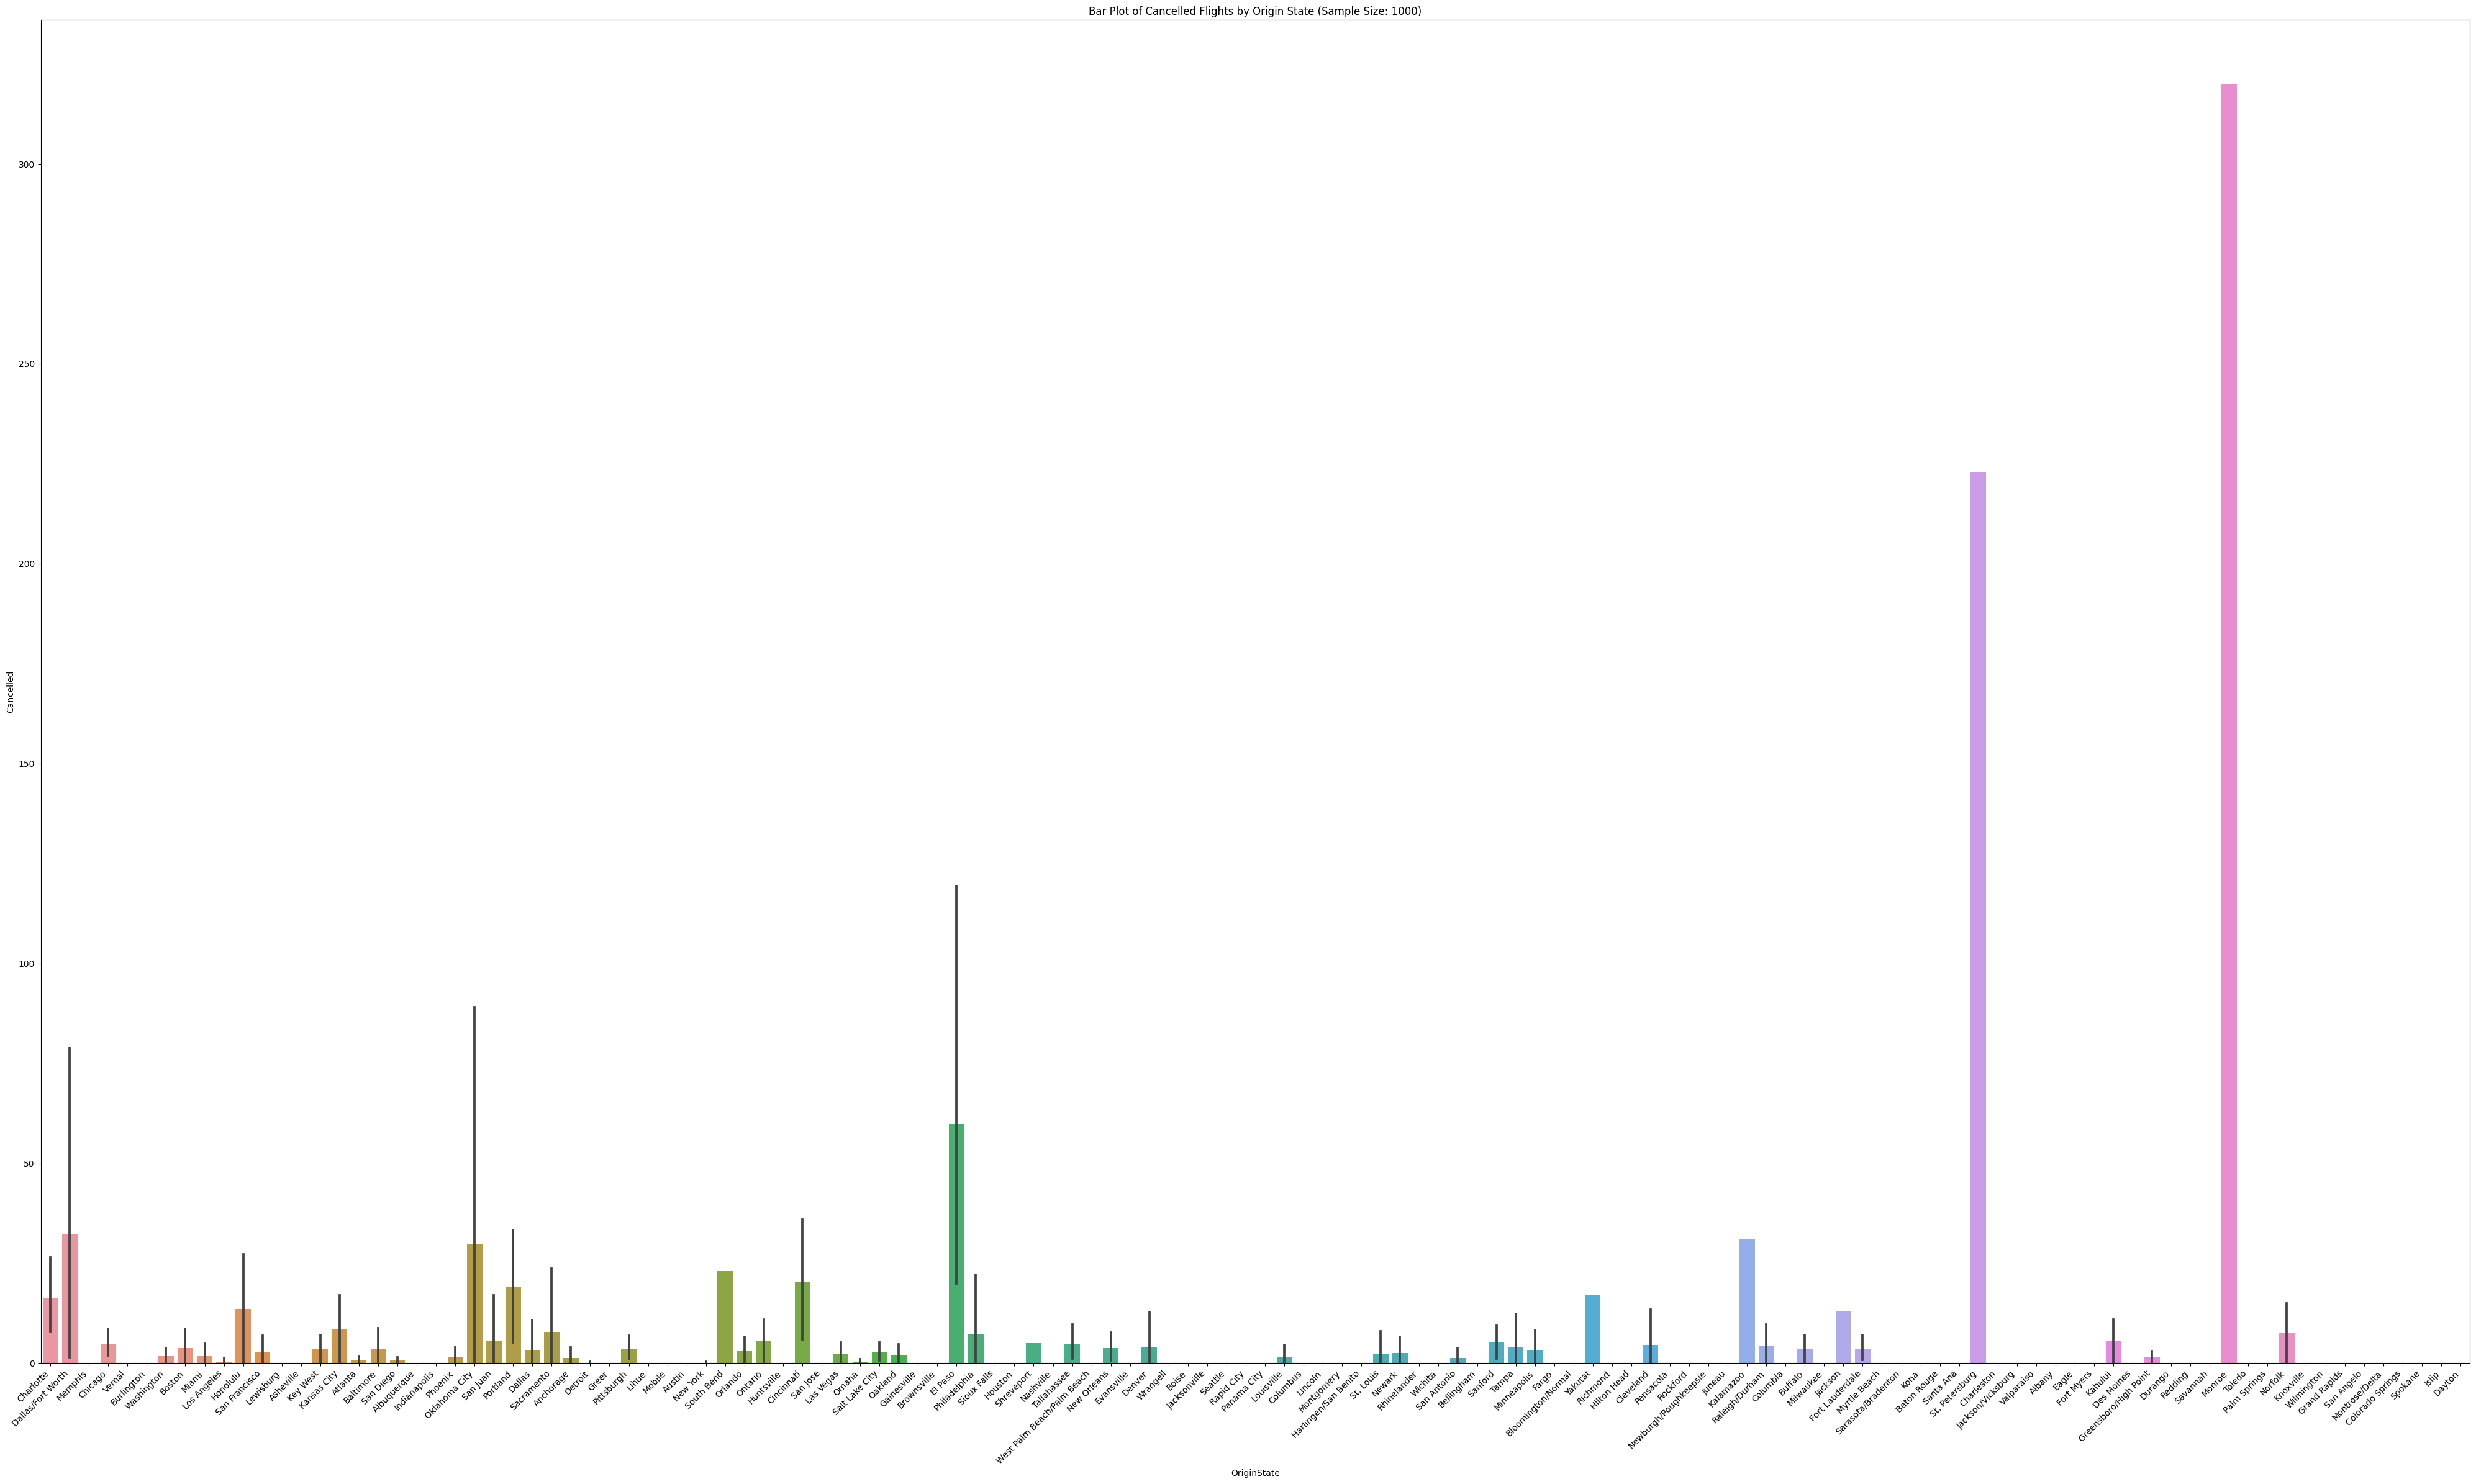

In [62]:
# Sample size for the bar plot
sample_size_barplot = 1000

# Taking a sample from the merged dataframe
merged_df_sample_barplot = merged_df.sample(n=sample_size_barplot, random_state=1)

# Creating a bar plot with the sampled data
plt.figure(figsize=(40, 24))  # Adjusted figsize for better visualization
barplot = sns.barplot(x='OriginState', y='Cancelled', data=merged_df_sample_barplot)
plt.title('Bar Plot of Cancelled Flights by Origin State (Sample Size: 1000)')

# Improving readability by rotating x-axis labels
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [63]:
# Aggregating and transforming
# Calculating the mean, median, and standard deviation of positive cases by state
cases_summary = merged_df.sample(n=1000, random_state=1).groupby('state')['positive'].agg(['mean', 'median', 'std'])
print("Summary Statistics of Positive Cases by State:")
print(cases_summary)

Summary Statistics of Positive Cases by State:
                mean    median            std
state                                        
AK       2789.416667     695.5    3917.207527
AL     122715.400000  139459.0   78391.366842
AR      43705.481481    3747.0   65149.124757
AS          0.000000       0.0       0.000000
AZ     149846.875000  178470.0   99999.351226
CA     329426.307692  126143.5  364356.879014
CO      66310.625000   53370.0   48328.543763
CT      43748.370370   46976.0   30110.109933
DC      12394.062500   16022.0    7479.265066
DE       9682.500000    3632.5   11773.989876
FL     279691.375000  113126.5  294896.843931
GA      57924.210526    7314.0  115467.465038
GU       2244.230769    1927.0    2141.698864
HI       8745.117647   10156.0    7704.601262
IA      58015.733333   50932.0   60720.863866
ID      27174.272727   10902.0   33159.664612
IL     222333.040000  176366.0  175713.992625
IN      43030.642857   62372.0   38371.476932
KS      32158.550000   13001.5   

In [64]:
#iteration
for index, row in merged_df.iterrows():
    print(row['date'], row['state'], row['positive'])

20200322 NJ 1914.0
20200322 NJ 1914.0
20200322 KY 99.0
20200322 KY 99.0
20200322 WA 3151.0
20200322 WA 3151.0
20200508 AK 377.0
20200508 AK 377.0
20200508 AK 377.0
20200508 OH 23016.0
20200508 OH 23016.0
20200508 OH 23016.0
20200508 ND 1424.0
20200508 ND 1424.0
20200508 ND 1424.0
20200508 MA 75333.0
20200508 MA 75333.0
20200508 MA 75333.0
20200801 SD 8867.0
20200801 SD 8867.0
20200801 KS 27812.0
20200801 KS 27812.0
20200801 MI 91332.0
20200801 MI 91332.0
20200801 PR 6543.0
20200801 PR 6543.0
20200801 NY 415767.0
20200801 NY 415767.0
20200330 MA 5653.0
20200330 MA 5653.0
20200330 MA 5653.0
20200330 MA 5653.0
20200330 MA 5653.0
20200330 MA 5653.0
20200330 UT 806.0
20200330 UT 806.0
20200330 UT 806.0
20200330 UT 806.0
20200330 UT 806.0
20200330 UT 806.0
20200330 NM 281.0
20200330 NM 281.0
20200330 NM 281.0
20200330 NM 281.0
20200330 NM 281.0
20200330 NM 281.0
20200330 SD 101.0
20200330 SD 101.0
20200330 SD 101.0
20200330 SD 101.0
20200330 SD 101.0
20200330 SD 101.0
20200330 CT 2571.0
2020

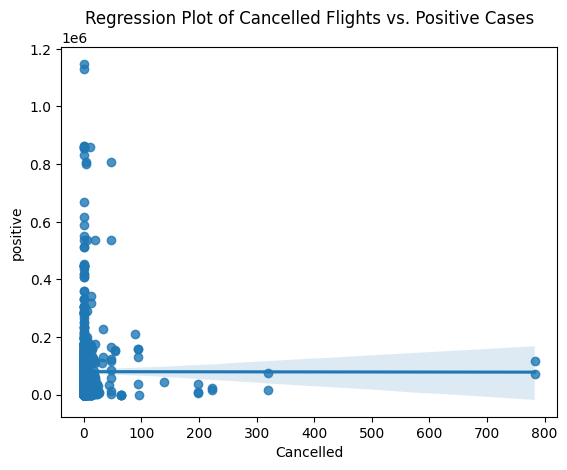

In [66]:
#out of curiosity, I wanted to view a regression plot (not included in the article due to redudancy)
sns.regplot(x='Cancelled', y='positive', data=merged_df_sample)
plt.title('Regression Plot of Cancelled Flights vs. Positive Cases')
plt.show()

T-test results: t-statistic = 0.0, p-value = 1.0


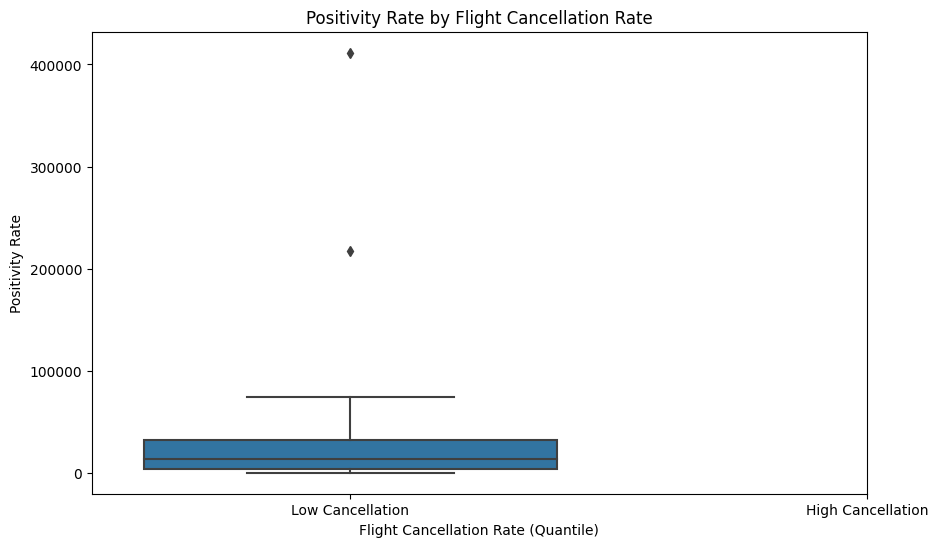

In [67]:
# Calculating positivity rates by state
positivity_rates = merged_df.groupby('state', as_index=False).apply(lambda x: x['positive'].sum() / x['Cancelled'].sum())
positivity_rates.columns = ['state', 'positivity_rate']

# Performing a statistical analysis
# Performing a t-test to compare positivity rates between states with different flight cancellation rates
high_cancel_states = merged_df[merged_df['Cancelled'] > merged_df['Cancelled'].median()]['state'].unique()
low_cancel_states = merged_df[merged_df['Cancelled'] <= merged_df['Cancelled'].median()]['state'].unique()

if len(high_cancel_states) > 0 and len(low_cancel_states) > 0:
    high_cancel_positivity_rates = positivity_rates[positivity_rates['state'].isin(high_cancel_states)]['positivity_rate']
    low_cancel_positivity_rates = positivity_rates[positivity_rates['state'].isin(low_cancel_states)]['positivity_rate']
    
    if len(high_cancel_positivity_rates) > 0 and len(low_cancel_positivity_rates) > 0:
        t_statistic, p_value = stats.ttest_ind(high_cancel_positivity_rates, low_cancel_positivity_rates)
        print(f"T-test results: t-statistic = {t_statistic}, p-value = {p_value}")
    else:
        print("Insufficient data for t-test")
else:
    print("Insufficient data for t-test")

# Visualizing relationships and patterns
# Creating a box plot to visualize distribution of positivity rates by flight cancellation rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(merged_df['Cancelled'], q=[0, 0.5, 1], duplicates='drop'), y=positivity_rates['positivity_rate'])
plt.title('Positivity Rate by Flight Cancellation Rate')
plt.xlabel('Flight Cancellation Rate (Quantile)')
plt.ylabel('Positivity Rate')
plt.xticks(ticks=[0, 1], labels=['Low Cancellation', 'High Cancellation'])
plt.show()

In [68]:
# Counting occurrences of each origin state
origin_counts = merged_df.groupby('OriginState').size().reset_index(name='count')
print(origin_counts)

# Counting occurrences of each destination state
destination_counts = merged_df.groupby('DestinationState').size().reset_index(name='count')
print(destination_counts)

                    OriginState  count
0                        Albany      1
1                   Albuquerque      7
2                      Amarillo      1
3                     Anchorage     10
4                     Asheville      4
..                          ...    ...
134  West Palm Beach/Palm Beach     15
135                     Wichita     13
136                  Wilmington      6
137                    Wrangell      4
138                     Yakutat      4

[139 rows x 2 columns]
               DestinationState  count
0                      Aberdeen      2
1                       Abilene      2
2                     Aguadilla      4
3                   Albuquerque     16
4                      Amarillo      5
..                          ...    ...
138                  Washington     60
139  West Palm Beach/Palm Beach     22
140                White Plains      4
141                     Wichita      3
142                   Williston      6

[143 rows x 2 columns]


In [70]:
# Finding the top origin state
top_origin_state = origin_counts.sort_values(by='count', ascending=False).iloc[0]
print(f"The top origin state is {top_origin_state['OriginState']} with {top_origin_state['count']} occurrences.")

# Finding the top destination state
top_destination_state = destination_counts.sort_values(by='count', ascending=False).iloc[0]
print(f"The top destination state is {top_destination_state['DestinationState']} with {top_destination_state['count']} occurrences.")

The top origin state is Chicago with 149 occurrences.
The top destination state is Atlanta with 151 occurrences.


In [72]:
# Selecting columns
selected_columns = merged_df[['positive', 'Cancelled', 'Delay', 'OriginState', 'DestinationState']]

In [73]:
# Filtering for cancelled flights
cancelled_flights = selected_columns[selected_columns['Cancelled'] == 1]

In [75]:
# Converting 'Delay' to datetime format
selected_columns['Delay'] = pd.to_datetime(selected_columns['Delay'], format='%H:%M:%S')

# Converingt 'Delay' to minutes
selected_columns['Delay'] = selected_columns['Delay'].dt.hour * 60 + selected_columns['Delay'].dt.minute

#Calculating the mean
average_delay = selected_columns.groupby('OriginState')['Delay'].mean()

C:\Users\meand\AppData\Local\Temp\ipykernel_16436\34031190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Delay'] = pd.to_datetime(selected_columns['Delay'], format='%H:%M:%S')
C:\Users\meand\AppData\Local\Temp\ipykernel_16436\34031190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Delay'] = selected_columns['Delay'].dt.hour * 60 + selected_columns['Delay'].dt.minute


In [76]:
selected_columns['Delayed'] = selected_columns['Delay'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\meand\AppData\Local\Temp\ipykernel_16436\502175653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Delayed'] = selected_columns['Delay'].apply(lambda x: 1 if x > 0 else 0)


In [77]:
# Counting the number of delayed flights by origin state
for index, row in selected_columns.iterrows():
    print(row['OriginState'], row['positive'])

Pittsburgh 1914.0
Los Angeles 1914.0
Pittsburgh 99.0
Los Angeles 99.0
Pittsburgh 3151.0
Los Angeles 3151.0
Houston 377.0
Wichita 377.0
Wrangell 377.0
Houston 23016.0
Wichita 23016.0
Wrangell 23016.0
Houston 1424.0
Wichita 1424.0
Wrangell 1424.0
Houston 75333.0
Wichita 75333.0
Wrangell 75333.0
Dallas 8867.0
Chicago 8867.0
Dallas 27812.0
Chicago 27812.0
Dallas 91332.0
Chicago 91332.0
Dallas 6543.0
Chicago 6543.0
Dallas 415767.0
Chicago 415767.0
San Diego 5653.0
Kansas City 5653.0
San Jose 5653.0
Wilmington 5653.0
Montgomery 5653.0
Knoxville 5653.0
San Diego 806.0
Kansas City 806.0
San Jose 806.0
Wilmington 806.0
Montgomery 806.0
Knoxville 806.0
San Diego 281.0
Kansas City 281.0
San Jose 281.0
Wilmington 281.0
Montgomery 281.0
Knoxville 281.0
San Diego 101.0
Kansas City 101.0
San Jose 101.0
Wilmington 101.0
Montgomery 101.0
Knoxville 101.0
San Diego 2571.0
Kansas City 2571.0
San Jose 2571.0
Wilmington 2571.0
Montgomery 2571.0
Knoxville 2571.0
San Diego 256.0
Kansas City 256.0
San Jose 256

In [78]:
cancelled_counts = selected_columns.groupby('OriginState')['Cancelled'].sum()

In [79]:
#creating a pivot table
pivot_table = selected_columns.pivot_table(values='Delay', index='OriginState', columns='DestinationState', aggfunc=np.mean)

In [81]:
# Calculating the probability of flight cancellation by origin state
origin_cancel_prob = selected_columns.groupby('OriginState')['Cancelled'].mean()

In [82]:
# Printing the first few rows of the pivot table
print(pivot_table.head())

# Printing the first few rows of the conditional probability
print(origin_cancel_prob.head())

DestinationState  Aberdeen  Abilene  Aguadilla  Albuquerque  Amarillo  \
OriginState                                                             
Albany                 NaN      NaN        NaN          NaN       NaN   
Albuquerque            NaN      NaN        NaN          NaN       NaN   
Amarillo               NaN      NaN        NaN          NaN       NaN   
Anchorage              NaN      NaN        NaN          NaN       NaN   
Asheville              NaN      NaN        NaN          NaN       NaN   

DestinationState  Appleton  Asheville  Aspen  Atlanta  Austin  ...  Syracuse  \
OriginState                                                    ...             
Albany                 NaN        NaN    NaN      NaN     NaN  ...       NaN   
Albuquerque            NaN        NaN    NaN      NaN     NaN  ...       NaN   
Amarillo               NaN        NaN    NaN      NaN     NaN  ...       NaN   
Anchorage              NaN        NaN    NaN      NaN     NaN  ...       NaN   
Ashevill

In [83]:
# Calculating probability of cancellation by origin state
cancel_prob_by_origin = merged_df.groupby('OriginState')['Cancelled'].mean()

print(cancel_prob_by_origin)

OriginState
Albany                         0.0
Albuquerque                    0.0
Amarillo                       0.0
Anchorage                      1.2
Asheville                      0.0
                              ... 
West Palm Beach/Palm Beach     0.0
Wichita                        0.0
Wilmington                     0.0
Wrangell                       0.0
Yakutat                       17.0
Name: Cancelled, Length: 139, dtype: float64


In [86]:
# Finding the origin state with the highest probability of cancellation
state_with_highest_cancel_prob = cancel_prob_by_origin.idxmax()

print(state_with_highest_cancel_prob)

Monroe


In [87]:
# Calculating the mean of positive cases by origin state
mean_positive_by_origin = merged_df.groupby('OriginState')['positive'].mean()

# Finding the origin state with the highest mean of positive cases
state_with_highest_mean_positive = mean_positive_by_origin.idxmax()

print(state_with_highest_mean_positive)

Panama City


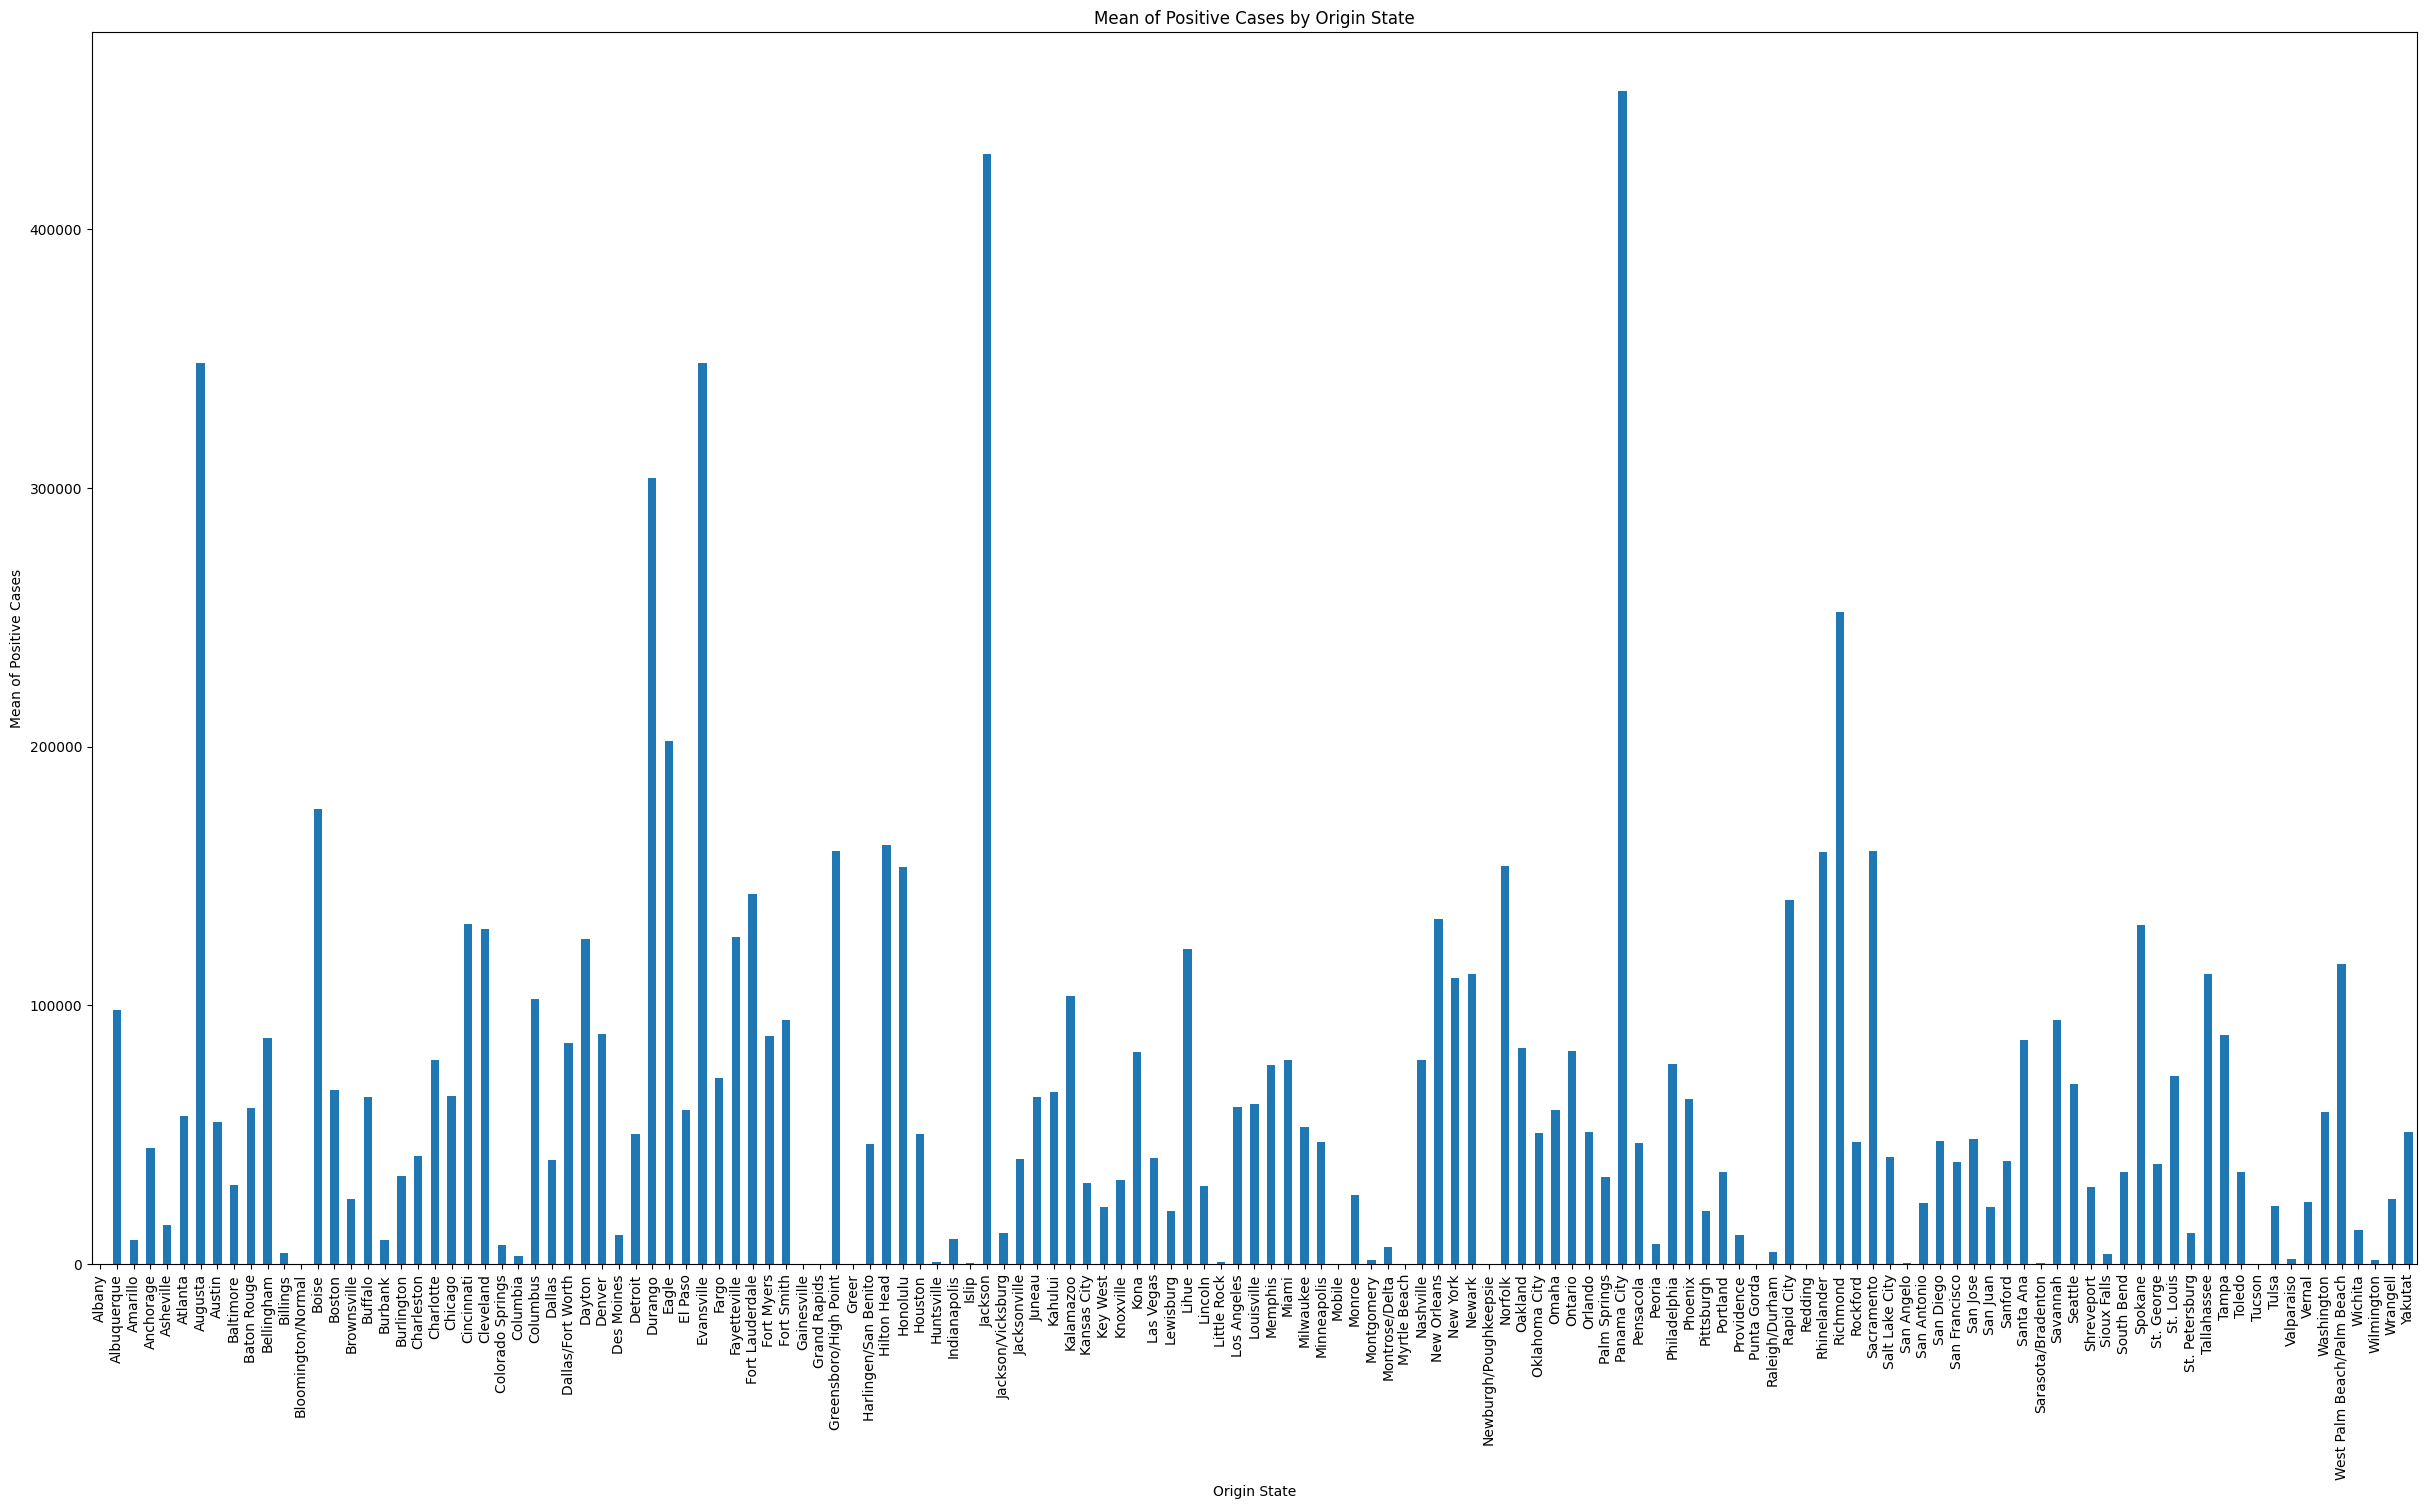

In [89]:
# Creating a bar plot of the mean positive cases by origin state
mean_positive_by_origin.plot(kind='bar', figsize=(30, 16))

plt.title('Mean of Positive Cases by Origin State')
plt.xlabel('Origin State')
plt.ylabel('Mean of Positive Cases')

plt.show()